# Loan Application Status Prediction

Project Description

This dataset includes details of applicants who have applied for loan. The dataset includesdetails like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1. Loan_ID - This refer to the unique identifier of the applicant&#39;s affirmed purchases
2. Gender - This refers to either of the two main categories (male and female) into which
applicants are divided on the basis of their reproductive functions
3. Married - This refers to applicant being in a state of matrimony
4. Dependents - This refres to persons who depends on the applicants for survival
5. Education - This refers to number of years in which applicant received systematic
instruction, especially at a school or university
6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner
of a business rather than for an employer
7. Applicant Income - This refers to disposable income available for the applicant&#39;s use
under State law.
8. CoapplicantIncome - This refers to disposable income available for the people that
participate in the loan application process alongside the main applicant use under State
law.
9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the
applicant
11. Credit History - This refers to a record of applicant&#39;s ability to repay debts and
demonstrated responsibility in repaying them.
12. Property_Area - This refers to the total area within the boundaries of the property as set
out in Schedule.
13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan
requested.
You have to build a model that can predict whether the loan of the applicant will be
approved(Loan_status) or not on the basis of the details provided in the dataset. 
Dataset Link- https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

# IMPORTING LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# GETTING THE DATASET

In [2]:
df=pd.read_csv('loan_application_status_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.shape

(614, 13)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

# REMOVING DUPLICATES

In [8]:
df['Loan_ID'].duplicated().sum()

0

In [9]:
df['Gender'].duplicated().sum()

611

In [10]:
df['Married'].duplicated().sum()

611

In [11]:
df['Dependents'].duplicated().sum()

609

In [12]:
df['Education'].duplicated().sum()

612

In [13]:
df['Self_Employed'].duplicated().sum()

611

In [14]:
df['ApplicantIncome'].duplicated().sum()

109

In [15]:
df['CoapplicantIncome'].duplicated().sum()

327

In [16]:
df['LoanAmount'].duplicated().sum()

410

In [17]:
df['Loan_Amount_Term'].duplicated().sum()

603

In [18]:
df['Credit_History'].duplicated().sum()

611

In [19]:
df['Property_Area'].duplicated().sum()

611

In [20]:
df['Loan_Status'].duplicated().sum()

612

In [21]:
df1=df.drop_duplicates()
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
df1.duplicated().sum()

0

In [23]:
df1.shape

(614, 13)

In [24]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# CONVERTING OBJECT DATA

In [25]:
from sklearn.preprocessing import OrdinalEncoder
ordin=OrdinalEncoder()

In [26]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=ordin.fit_transform(df1[i].values.reshape(-1,1))

In [27]:
df1.dtypes

Loan_ID              float64
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [28]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# FILLING NULL DATAS

In [29]:
for i in df1.columns:
    df1[i].fillna(np.mean(df1[i]),inplace=True)

In [30]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# CONVERTING FLOAT DATA INTO INT DATA FOR BETTER EXECUTION

In [31]:
for i in df1.columns:
    if df1[i].dtypes=='float':
        df1[i]=df1[i].astype('int')  

In [32]:
df1.dtypes

Loan_ID              int32
Gender               int32
Married              int32
Dependents           int32
Education            int32
Self_Employed        int32
ApplicantIncome      int64
CoapplicantIncome    int32
LoanAmount           int32
Loan_Amount_Term     int32
Credit_History       int32
Property_Area        int32
Loan_Status          int32
dtype: object

# DATA VISUALIZATION

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

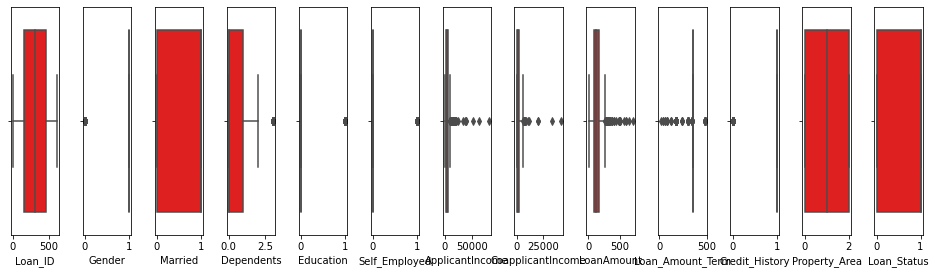

In [34]:
collist=df1.columns.values
ncol=50
nrows=40
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df1[collist[i]],color='red')
    plt.tight_layout()

The above gives a clear view of the variables's distribution

Loan_ID                 AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Gender               AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Married              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Dependents           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Education            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Self_Employed        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
ApplicantIncome      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.0945122x0.343182)
LoanAmount              AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Loan_Amount_Term        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Credit_History          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Property_Area           AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Loan_Status             AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

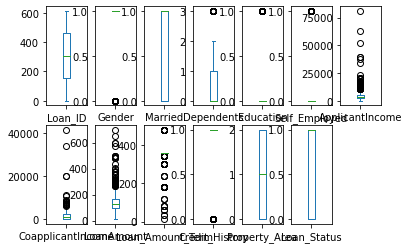

In [35]:
df1.plot(kind='box',subplots=True,layout=(2,7))

 The above indicates the outliers presence

<AxesSubplot:xlabel='Married', ylabel='Dependents'>

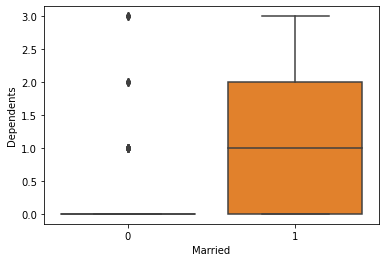

In [36]:
sns.boxplot(data=df1,x='Married',y='Dependents')

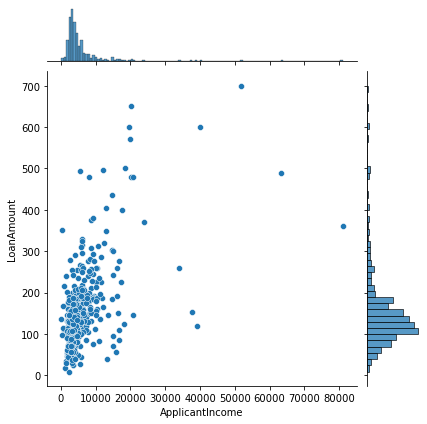

In [37]:
sns.jointplot(df1['ApplicantIncome'],df1['LoanAmount'])

The above two figures explains about comparison two different columns

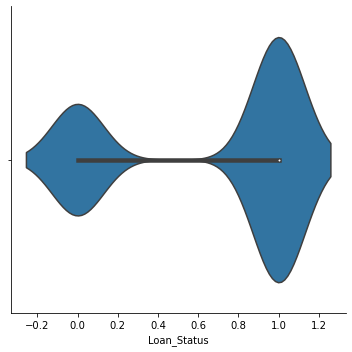

In [38]:
sns.catplot(data=df1,x='Loan_Status',kind='violin')

The above figure gives the distribution range  of Loan_Status

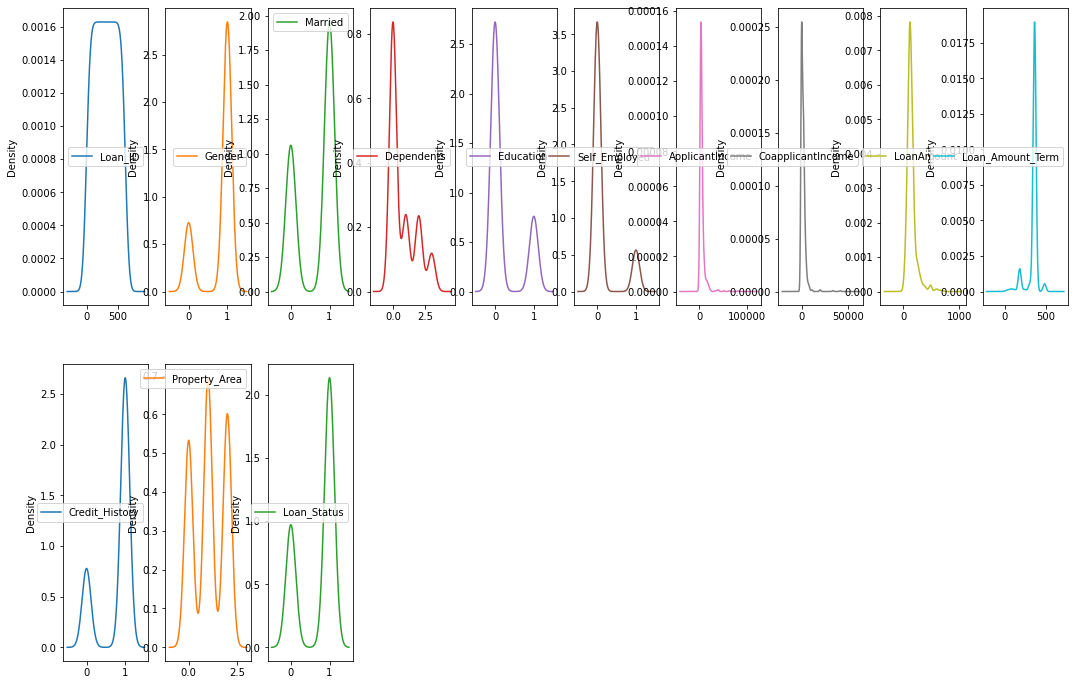

In [39]:
df1.plot(figsize=(18,12),kind='density',subplots=True,layout=(2,10),legend=True,sharex=False ) 
plt.show()

This picture explains the density of the columns

<AxesSubplot:ylabel='Count'>

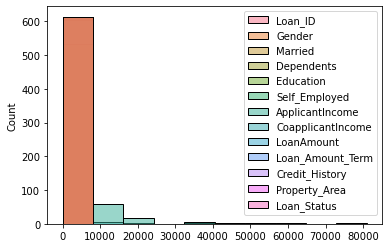

In [40]:
sns.histplot(data=df1,bins=10)

This graph explains the histogram distribution of the dataset

# MORE EDA

In [41]:
df1.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.796417,0.648208,0.744300,0.218241,0.133550,5403.459283,1621.24430,146.397394,342.000000,0.773616,1.037459,0.687296
std,177.390811,0.402991,0.477919,1.009623,0.413389,0.340446,6109.041673,2926.24876,84.037503,64.372489,0.418832,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.00000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.00000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.50000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.25000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.00000,700.000000,480.000000,1.000000,2.000000,1.000000


OBSERVATION:
    
    1)GENDER,MARRIED,DEPENDANTS,LOAN_AMOUNT_TERM,CREDIT_HISTORY,PROPERTY_AREA,LOAN_STATUS HAVE MEAN LESSER THAN MEDIAN SO IT MAY HAVE RIGHT SKEWED DATA.
    
    2)EDUCATION,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT SHOW MEAN MORE THAN  MEDIAN SO IT MAY HAVE LEFT SKEWED DATA.
    
    3)DEPENDANTS,APPLICANTINCOME,COAPPLICANTINCOME,LOANAMOUNT AND LOAN_AMOUNT_TERM SHOWS VAST DIFFERENCE BETWEEN 75 % AND MAX AND SO THEY MAY HAVE MANY OUTLIERS

In [42]:
df1.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.046016,-0.013027,0.051559,0.039442,0.032874,0.016925,0.039211,0.035711,-0.028945,-0.034176,-0.155416,0.011773
Gender,-0.046016,1.000000,0.339026,0.148500,0.061497,-0.027421,0.013933,0.082316,0.064579,-0.070179,0.035780,-0.017054,0.025407
Married,-0.013027,0.339026,1.000000,0.340684,0.017671,0.008491,0.050194,0.080496,0.145647,-0.103400,-0.023626,0.000395,0.084281
Dependents,0.051559,0.148500,0.340684,1.000000,0.055752,0.056798,0.118202,0.030429,0.163108,-0.101054,-0.017523,-0.000244,0.010118
Education,0.039442,0.061497,0.017671,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.167041,-0.077242,-0.081637,-0.065243,-0.085884
Self_Employed,0.032874,-0.027421,0.008491,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115259,-0.033943,-0.004994,-0.030860,-0.003700
ApplicantIncome,0.016925,0.013933,0.050194,0.118202,-0.140760,0.127180,1.000000,-0.116604,0.565621,-0.045242,0.006986,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082316,0.080496,0.030429,-0.062290,-0.016100,-0.116604,1.000000,0.187863,-0.059674,-0.058796,0.010521,-0.059188
LoanAmount,0.035711,0.064579,0.145647,0.163108,-0.167041,0.115259,0.565621,0.187863,1.000000,0.038812,-0.034518,-0.044818,-0.036345
Loan_Amount_Term,-0.028945,-0.070179,-0.103400,-0.101054,-0.077242,-0.033943,-0.045242,-0.059674,0.038812,1.000000,0.005446,-0.077620,-0.020974


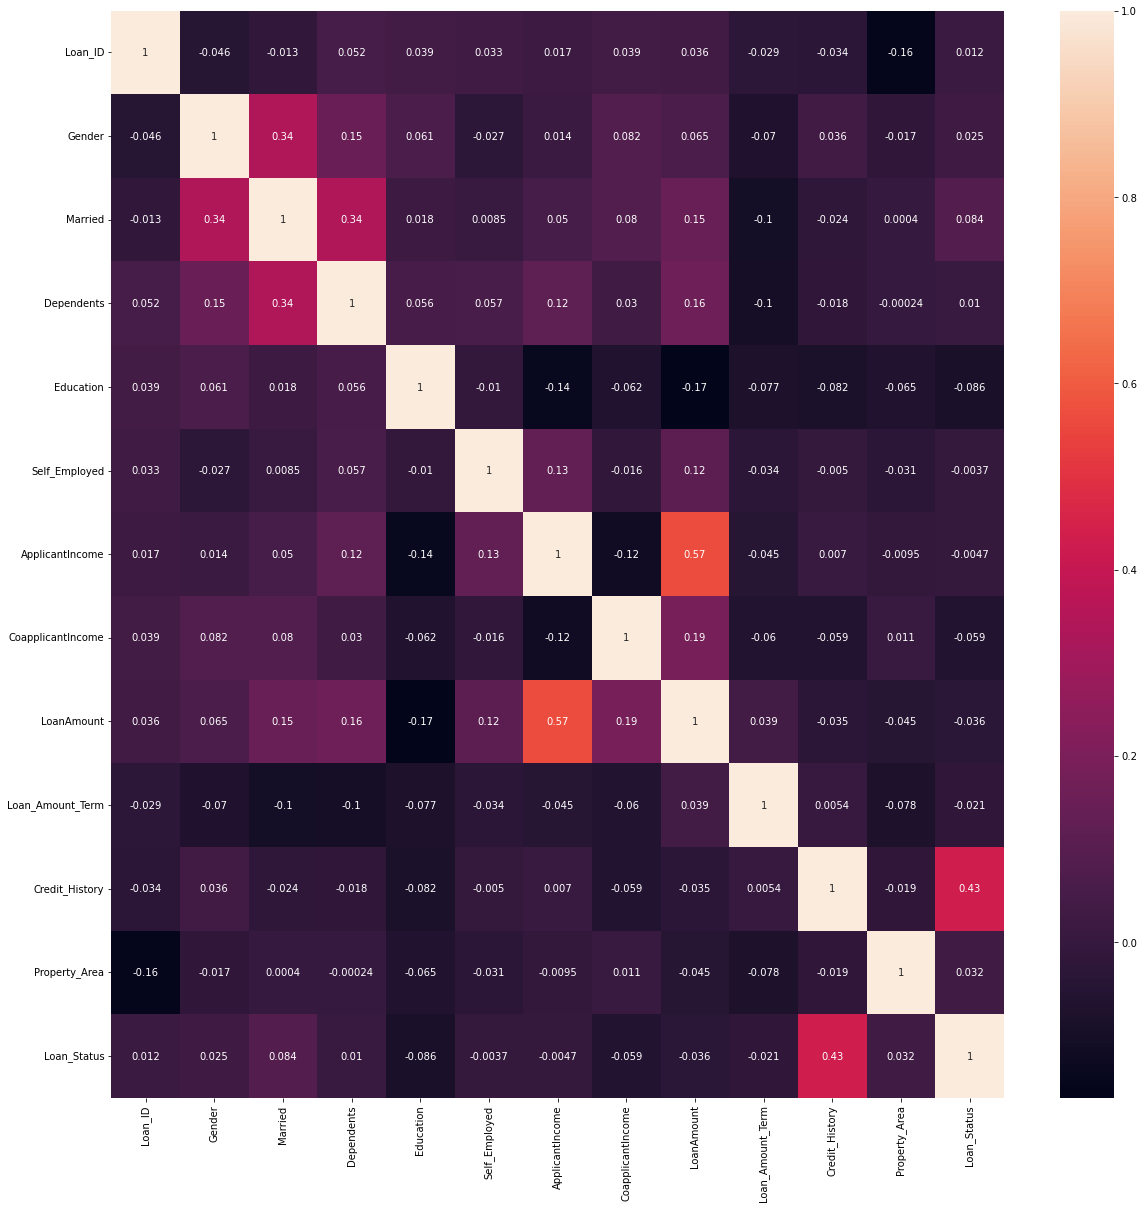

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

WE FIND MANY COLUMNS ARE MULTICORRELATED 

In [44]:
df1.skew()

Loan_ID              0.000000
Gender              -1.475893
Married             -0.622252
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491530
LoanAmount           2.727127
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

# REMOVING OUTLIERS AND SKEW

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df1))

In [46]:
dfnew=df1[(z<3).all(axis=1)]
dfnew.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0,146,360,1,2,1
1,1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,2,1,1,0,0,1,3000,0,66,360,1,2,1
3,3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,4,1,0,0,0,0,6000,0,141,360,1,2,1


In [47]:
dfnew.skew()

Loan_ID              0.010879
Gender              -1.469056
Married             -0.606316
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350518
LoanAmount           1.114116
Loan_Amount_Term    -2.077031
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# SPLITTING X AND Y 

In [48]:
x=dfnew.drop('Loan_Status',axis=1)
y=dfnew['Loan_Status']

In [49]:
x.shape

(577, 12)

In [50]:
y.shape

(577,)

# WORKING ON MULTICOLLINEARITY

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [52]:
def vif_calc():
    vif=pd.DataFrame() 
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['FEATURES']=x.columns
    print(vif)

In [53]:
vif_calc()

    VIF Factor           FEATURES
0     3.856704            Loan_ID
1     5.598598             Gender
2     3.715525            Married
3     1.801459         Dependents
4     1.340113          Education
5     1.230043      Self_Employed
6     5.509963    ApplicantIncome
7     2.494850  CoapplicantIncome
8    11.375356         LoanAmount
9    13.827342   Loan_Amount_Term
10    4.272435     Credit_History
11    2.628581      Property_Area


# BALANCING X AND Y

In [54]:
from sklearn.preprocessing import power_transform

In [55]:
newx=power_transform(x)
dfx=pd.DataFrame(data=newx,columns=x.columns)
dfx.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,-2.159166,0.507031,-1.347084,-0.809243,-0.541961,-0.380580,0.681780,-1.122441,0.309321,0.142609,0.541961,1.194806
1,-2.133423,0.507031,0.742344,0.902869,-0.541961,-0.380580,0.234783,0.744121,-0.015522,0.142609,0.541961,-1.340199
2,-2.111392,0.507031,0.742344,-0.809243,-0.541961,2.627567,-0.527201,-1.122441,-1.443042,0.142609,0.541961,1.194806
3,-2.091472,0.507031,0.742344,-0.809243,1.845150,-0.380580,-0.791972,0.895789,-0.169525,0.142609,0.541961,1.194806
4,-2.072986,0.507031,-1.347084,-0.809243,-0.541961,-0.380580,0.728848,-1.122441,0.221843,0.142609,0.541961,1.194806


In [56]:
dfx.shape

(577, 12)

In [57]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

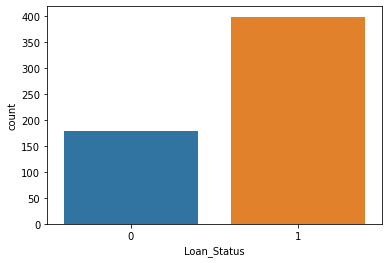

In [58]:
sns.countplot(y)

In [59]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
xnew,ynew=smt.fit_resample(dfx,y)

In [60]:
ynew.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

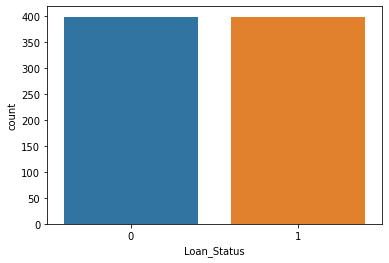

In [61]:
sns.countplot(ynew)

# TRAINING AND TESTING

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [63]:
maxAcc=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(xnew,ynew,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    score=accuracy_score(y_test,predlr)
    print('Accuracy_score of LogisticRegression ' ,score, 'at random_state ' ,i)
    if score > maxAcc:
        maxAcc=score
        maxRS=i
    print('Mac acc score of lr ' ,maxAcc*100, 'at random_state ' ,maxRS) 

Accuracy_score of LogisticRegression  0.6875 at random_state  0
Mac acc score of lr  68.75 at random_state  0
Accuracy_score of LogisticRegression  0.71875 at random_state  1
Mac acc score of lr  71.875 at random_state  1
Accuracy_score of LogisticRegression  0.71875 at random_state  2
Mac acc score of lr  71.875 at random_state  1
Accuracy_score of LogisticRegression  0.73125 at random_state  3
Mac acc score of lr  73.125 at random_state  3
Accuracy_score of LogisticRegression  0.6375 at random_state  4
Mac acc score of lr  73.125 at random_state  3
Accuracy_score of LogisticRegression  0.70625 at random_state  5
Mac acc score of lr  73.125 at random_state  3
Accuracy_score of LogisticRegression  0.74375 at random_state  6
Mac acc score of lr  74.375 at random_state  6
Accuracy_score of LogisticRegression  0.725 at random_state  7
Mac acc score of lr  74.375 at random_state  6
Accuracy_score of LogisticRegression  0.7125 at random_state  8
Mac acc score of lr  74.375 at random_state  

In [64]:
x_train,x_test,y_train,y_test=train_test_split(xnew,ynew,test_size=0.20,random_state=353)
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
score=accuracy_score(predlr,y_test)
print('Accuracy_score of LogisticRegression ' ,score*100)
print(confusion_matrix(predlr,y_test))
print(classification_report(predlr,y_test))

Accuracy_score of LogisticRegression  81.25
[[44 12]
 [18 86]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        56
           1       0.88      0.83      0.85       104

    accuracy                           0.81       160
   macro avg       0.79      0.81      0.80       160
weighted avg       0.82      0.81      0.81       160



# HYPERTUNING LOGISTIC REGRESSION

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
lr=LogisticRegression()
parameters={'C':[100,10,1,0.1,0.01]}
gscvlr=GridSearchCV(estimator=lr,param_grid=parameters)
gscvlr.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01]})

In [67]:
print(gscvlr.best_params_)

{'C': 0.1}


In [68]:
lr1=LogisticRegression(C=0.1)
lr1.fit(x_train,y_train)
predlr1=lr1.predict(x_test)
print('Accuracy_score ' ,accuracy_score(y_test,predlr1)*100)

Accuracy_score  81.25


SINCE LOGISTIC REGRESSION SHOWS LOW RESULT , CAN TRY FOR MANY MODELS

# TESING MORE MODELS

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
knc=KNeighborsClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
svc=SVC()

In [70]:
model=[knc,gbc,abc,etc,rfc,dtc,svc]
for i in model:
    i.fit(x_train,y_train)
    predi=i.predict(x_test)
    print('Accuracy_score of model ' , i ,'is = ' ,accuracy_score(y_test,predi)*100)

Accuracy_score of model  KNeighborsClassifier() is =  75.625
Accuracy_score of model  GradientBoostingClassifier() is =  85.625
Accuracy_score of model  AdaBoostClassifier() is =  78.75
Accuracy_score of model  ExtraTreesClassifier() is =  86.875
Accuracy_score of model  RandomForestClassifier() is =  86.875
Accuracy_score of model  DecisionTreeClassifier() is =  81.25
Accuracy_score of model  SVC() is =  83.75


# CROSS-VALIDATION

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
 for i in range(2,10):
        models=[knc,gbc,abc,etc,rfc,dtc,svc]
        for j in models:
            j.fit(x_train,y_train)
            predj=j.predict(x_test)
            score=accuracy_score(y_test,predj)
            cross=cross_val_score(j,x_train,y_train,cv=i)
    
            print('Accuracy_score of model ' ,j, 'is equal == ' ,score*100)
            print('Cross validation of model ' ,j, 'is equal == ' ,cross.mean(),'at cv = ' ,i)
            print('Diff between accuracy_score and cross validation of model ' ,j, 'is equal == ' , score-(cross.mean()))

Accuracy_score of model  KNeighborsClassifier() is equal ==  75.625
Cross validation of model  KNeighborsClassifier() is equal ==  0.6776729559748427 at cv =  2
Diff between accuracy_score and cross validation of model  KNeighborsClassifier() is equal ==  0.0785770440251573
Accuracy_score of model  GradientBoostingClassifier() is equal ==  85.625
Cross validation of model  GradientBoostingClassifier() is equal ==  0.7358490566037736 at cv =  2
Diff between accuracy_score and cross validation of model  GradientBoostingClassifier() is equal ==  0.12040094339622631
Accuracy_score of model  AdaBoostClassifier() is equal ==  78.75
Cross validation of model  AdaBoostClassifier() is equal ==  0.6839622641509433 at cv =  2
Diff between accuracy_score and cross validation of model  AdaBoostClassifier() is equal ==  0.10353773584905668
Accuracy_score of model  ExtraTreesClassifier() is equal ==  86.25
Cross validation of model  ExtraTreesClassifier() is equal ==  0.7924528301886793 at cv =  2
Di

# HYPERTUNING

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_etc=GridSearchCV(estimator=etc,param_grid=parameters)
gscv_etc.fit(x_train,y_train)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [75]:
print(gscv_etc.best_score_)
print(gscv_etc.best_params_)
print(gscv_etc.best_estimator_)

0.7232775590551181
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 200}
ExtraTreesClassifier(max_depth=3, max_features='log2', n_estimators=200)


In [76]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_rfc=GridSearchCV(estimator=rfc,param_grid=parameters)
gscv_rfc.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [77]:
print(gscv_rfc.best_score_)
print(gscv_rfc.best_params_)
print(gscv_rfc.best_estimator_)

0.7327140748031497
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 150}
RandomForestClassifier(max_depth=3, n_estimators=150)


In [78]:
parameters={'n_estimators':[50,100,150,200],
            'criterion':['gini','squared_error'],
            'max_depth':[1,2,3],
            'max_features':['auto','sqrt','log2']}
gscv_gbc=GridSearchCV(estimator=gbc,param_grid=parameters)
gscv_gbc.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['gini', 'squared_error'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [79]:
print(gscv_gbc.best_score_)
print(gscv_gbc.best_params_)
print(gscv_gbc.best_estimator_)

0.7782849409448819
{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 200}
GradientBoostingClassifier(criterion='squared_error', max_features='log2',
                           n_estimators=200)


In [80]:
svc=SVC()
kernel_value={'kernel':['rbf','linear','poly']}

In [81]:
gscv_svc=GridSearchCV(estimator=svc,param_grid=kernel_value)
gscv_svc.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'linear', 'poly']})

In [82]:
print(gscv_svc.best_score_)
print(gscv_svc.best_estimator_)
print(gscv_svc.best_params_)

0.7091166338582677
SVC()
{'kernel': 'rbf'}


# ROC_CURVE

In [83]:
from sklearn.metrics import roc_curve

In [84]:
fpr,tpr,thresholds=roc_curve(y_test,etc.predict(x_test))

In [85]:
fpr

array([0.        , 0.17741935, 1.        ])

In [86]:
tpr

array([0.       , 0.8877551, 1.       ])

In [87]:
thresholds

array([2, 1, 0])

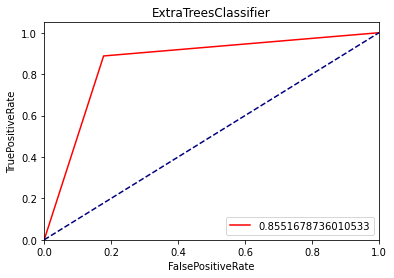

In [88]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,etc.predict(x_test))
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='red',label=roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.title('ExtraTreesClassifier')
plt.legend(loc='lower right')
plt.show()

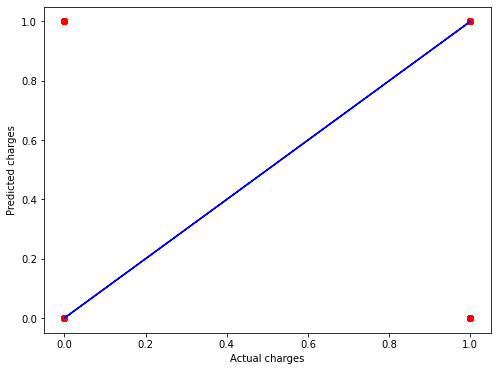

In [89]:
plt.figure(figsize=(8,6))
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.scatter(x=y_test,y=etc.predict(x_test),color='r')
plt.plot(y_test,y_test,color='b')
plt.savefig('=etc-loan.png')
plt.show()

# ROC_AUC_PLOT

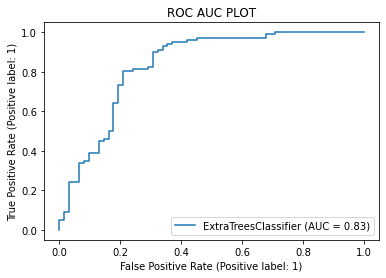

In [90]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gscv_etc.best_estimator_,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

In [91]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
predetc=etc.predict(x_test)
score=accuracy_score(y_test,predetc)
print('ACCURACY_SCORE OF THE BEST FITTED MODEL --EXTRA TREES CLASSIFIER',score*100)
print(confusion_matrix(y_test,predetc))
print(classification_report(y_test,predetc))

ACCURACY_SCORE OF THE BEST FITTED MODEL --EXTRA TREES CLASSIFIER 87.5
[[52 10]
 [10 88]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        62
           1       0.90      0.90      0.90        98

    accuracy                           0.88       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.88      0.88      0.88       160



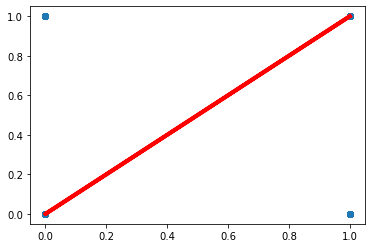

In [92]:
plt.scatter(predetc,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# PLOT_ROC_CURVE  OF ALL MODELS

In [93]:
from sklearn.metrics import roc_curve,plot_roc_curve

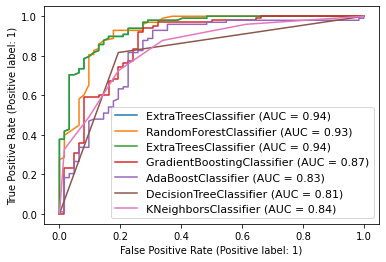

In [94]:
disp=plot_roc_curve(etc,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(etc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(abc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax = disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

# COMPARING WITH ALL MODELS EXTRA TREES CLASSIFIER SHOWS BEST RESULT IN ALL WAYS SO SAVING IT

In [95]:
import pickle
filename='loan_application_status_prediction.pkl'

In [96]:
pickle.dump(etc,open(filename,'wb'))

# LOADING THE BEST SAVED MODEL

In [97]:
pickle.load(open(filename,'rb'))

ExtraTreesClassifier()